# Dumb Storm Event Detector
Labels storm events based on flow rate by a comparison with the mean

In [7]:
import pandas as pd
from functions import read_observs, save_is_storm, predict_one_site

Load the data

In [8]:
river_data = read_observs(open("BRDS_2013_06_to_2015_05_v1.csv")).set_index("DateTime").sort_index()
river_data

Stage.m     Q.cms  Q.FLAG  Runoff.mmday  Precip.mmhr  \
DateTime                                                                    
2013-06-01 00:00:00  0.50229  0.055258     1.0       0.99257          0.0   
2013-06-01 00:15:00  0.49899  0.053632     1.0       0.96337          0.0   
2013-06-01 00:30:00  0.50085  0.054545     1.0       0.97977          0.0   
2013-06-01 00:45:00  0.50024  0.054242     1.0       0.97433          0.0   
2013-06-01 01:00:00  0.50026  0.054254     1.0       0.97455          0.0   
...                      ...       ...     ...           ...          ...   
2015-05-31 22:45:00  0.31349  0.006557     1.0       0.11777          0.0   
2015-05-31 23:00:00  0.31155  0.006375     1.0       0.11451          0.0   
2015-05-31 23:15:00  0.31001  0.006234     1.0       0.11198          0.0   
2015-05-31 23:30:00  0.30807  0.006059     1.0       0.10884          0.0   
2015-05-31 23:45:00  0.31552  0.006750     1.0       0.12126          0.0   

                     SpCond.uScm.Hobo  NO3.MGL.SUNA  NO3.MGL.Corrected.SUNA  \
DateTime                                                                      
2013-06-01 00:00:00          341.3756       0.32214                 0.27074   
2013-06-01 00:15:00          341.4838       0.34505                 0.29255   
2013-06-01 00:30:00          341.5746       0.32882                 0.27710   
2013-06-01 00:45:00          341.4421       0.34027                 0.28801   
2013-06-01 01:00:00          341.5547       0.32977                 0.27801   
...                               ...           ...                     ...   
2015-05-31 22:45:00          452.7011           NaN                     NaN   
2015-05-31 23:00:00          452.7249           NaN                     NaN   
2015-05-31 23:15:00          454.0941           NaN                     NaN   
2015-05-31 23:30:00          454.7132           NaN                     NaN   
2015-05-31 23:45:00          455.1703           NaN                     NaN   

                     Cl.MGL  NO3.MGL  Site  
DateTime                                    
2013-06-01 00:00:00     NaN      NaN  BRDS  
2013-06-01 00:15:00     NaN      NaN  BRDS  
2013-06-01 00:30:00     NaN      NaN  BRDS  
2013-06-01 00:45:00     NaN      NaN  BRDS  
2013-06-01 01:00:00     NaN      NaN  BRDS  
...                     ...      ...   ...  
2015-05-31 22:45:00     NaN      NaN  BRDS  
2015-05-31 23:00:00     NaN      NaN  BRDS  
2015-05-31 23:15:00     NaN      NaN  BRDS  
2015-05-31 23:30:00     NaN      NaN  BRDS  
2015-05-31 23:45:00     NaN      NaN  BRDS  

[70080 rows x 11 columns]

In [9]:
def with_hour(precip_data, hour):
    hrstr = str(hour) if hour >= 10 else "0" + str(hour)
    index = "HR"+ hrstr + "Val"
    t = precip_data[index].reset_index()
    t["DATE"] = t["DATE"] + pd.offsets.Hour(hour)
    return t.rename(columns={index: "Val", "DATE": "DateTime"}).set_index("DateTime")

def normalize(data, col):
    return (data[col] - data[col].mean())/data[col].std()

In [10]:
precip_data = pd.read_csv("USC00272174.csv")
precip_data["DATE"] = pd.to_datetime(precip_data["DATE"])
precip_data = precip_data.set_index("DATE")

temp = []
for hr in range(24):
    temp.append(with_hour(precip_data, hr))
precip_data = pd.concat(temp).sort_index()

                     Val
DateTime                
2014-08-31 00:00:00    0
2014-08-31 01:00:00    0
2014-08-31 02:00:00    0
2014-08-31 03:00:00    0
2014-08-31 04:00:00    0
...                  ...
2014-10-31 19:00:00    0
2014-10-31 20:00:00    0
2014-10-31 21:00:00    0
2014-10-31 22:00:00    0
2014-10-31 23:00:00    0

[1440 rows x 1 columns]


<AxesSubplot:xlabel='DateTime'>

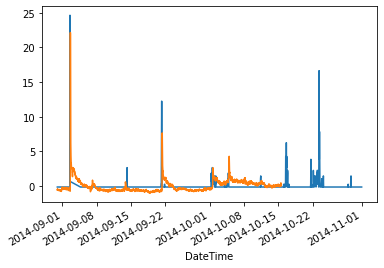

In [11]:
start_date = pd.to_datetime('2014-8-30 23:50:00')
end_date = pd.to_datetime('2014-11-1 00:00:00')

# filter time
precip_data = precip_data[(precip_data.index > start_date) & (precip_data.index < end_date)]
river_data = river_data[(river_data.index > start_date) & (river_data.index < end_date)]

# filter bad data
precip_data = precip_data[precip_data["Val"] >= 0]
# print(precip_data)

axes = normalize(precip_data, "Val").plot()
normalize(river_data, "Q.cms").plot(ax=axes)

In [12]:
# predicted = predict_one_site(precip_data, "Val")
# save_is_storm(predicted.reset_index(), precip_data, "LabeledByPrecipitation.csv")